## Import and Load Data

In [63]:
# Import Libraries for Data Analysis
from IPython.display import Markdown, display
import pandas as pd
import yfinance as yf
import pandas as pd
import os




In [78]:

def download_crypto_data(ticker, start_date, end_date)->pd.DataFrame:
    """
    Downloads cryptocurrency data using yfinance.

    Parameters:
        ticker (str): Ticker symbol of the cryptocurrency (e.g., 'BTC-USD').
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: DataFrame containing cryptocurrency data.
    """
    try:
        # Download data using yfinance
        crypto_data = yf.download(ticker, start=start_date, end=end_date)
        if not os.path.exists('data'):
            os.makedirs('data')
            
        # Save data to database
        crypto_data.to_csv(f'data/{ticker}.csv')
        return crypto_data
    except Exception as e:
        print("Error occurred:", e)
        return None


In [76]:
# Example usage:
ticker = 'BTC-USD'
start_date = '2020-01-01'
end_date = '2024-01-01'

crypto_data = download_crypto_data(ticker, start_date, end_date)

df=pd.read_csv(f'data/{ticker}.csv')


[*********************100%%**********************]  1 of 1 completed


In [77]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032


## SET UP AGENT 

In [67]:
import os
# Load API key from environment variable
api_key = os.getenv("OPENAI_API_KEY")

# Check if API key is set
if not api_key:
    raise ValueError("OpenAI API key is not set. Please set OPENAI_API_KEY environment variable.")



In [68]:
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0,api_key=api_key)
agent_executor = create_pandas_dataframe_agent(
    llm,
    df,
    agent_type="openai-tools",
    verbose=True,
    
)

## RUN THE QUERY 

In [69]:
agent_executor.invoke("how many columns are there ?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape[1]'}`


7There are 7 columns in the dataframe.

> Finished chain.


{'input': 'how many columns are there ?',
 'output': 'There are 7 columns in the dataframe.'}

In [70]:
agent_executor.invoke("identity the trend  ?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['Trend'] = df['Close'].diff().apply(lambda x: 'Up' if x > 0 else ('Down' if x < 0 else 'No Change'))"}`
responded: To identify the trend in the data, we typically look at the direction in which the values are moving over time. This can be done by analyzing the 'Close' prices in the dataframe. 

Here's a simple way to identify the trend based on the 'Close' prices:
- If the 'Close' price is increasing over time, it indicates an uptrend.
- If the 'Close' price is decreasing over time, it indicates a downtrend.
- If the 'Close' price is relatively stable with no clear upward or downward movement, it indicates a sideways or ranging trend.

Let's analyze the trend in the 'Close' prices of the dataframe provided.

The trend has been identified in the dataframe based on the 'Close' prices. The 'Trend' column has been added to the dataframe with the following trend indicators:
- 'Up': Indicates an uptrend 

{'input': 'identity the trend  ?',
 'output': "The trend has been identified in the dataframe based on the 'Close' prices. The 'Trend' column has been added to the dataframe with the following trend indicators:\n- 'Up': Indicates an uptrend (when the 'Close' price is increasing).\n- 'Down': Indicates a downtrend (when the 'Close' price is decreasing).\n- 'No Change': Indicates no clear trend (when the 'Close' price remains the same).\n\nYou can now check the 'Trend' column in the dataframe to see the trend for each date."}



> Entering new AgentExecutor chain...


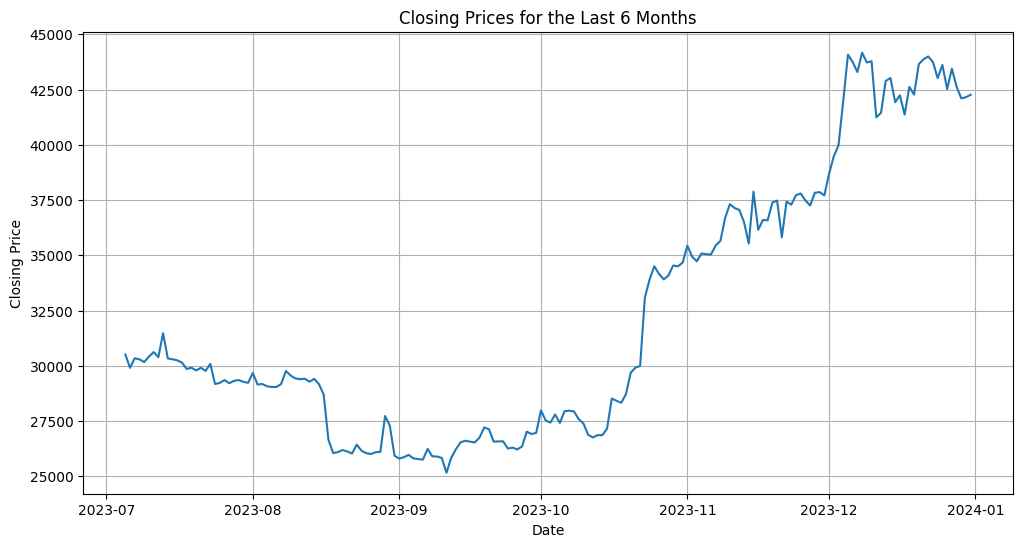


Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Convert 'Date' column to datetime\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Set 'Date' as the index\ndf.set_index('Date', inplace=True)\n\n# Extract data for the last 6 months\nlast_6_months = df.tail(180)\n\n# Plot the 'Close' prices for the last 6 months\nplt.figure(figsize=(12, 6))\nplt.plot(last_6_months.index, last_6_months['Close'])\nplt.title('Closing Prices for the Last 6 Months')\nplt.xlabel('Date')\nplt.ylabel('Closing Price')\nplt.grid(True)\nplt.show()"}`


I have plotted the closing prices for the last 6 months. The x-axis represents the dates, and the y-axis represents the closing prices. The plot shows the trend of closing prices over the last 6 months.

> Finished chain.


{'input': 'identity the trend and plot for last 6 month ?',
 'output': 'I have plotted the closing prices for the last 6 months. The x-axis represents the dates, and the y-axis represents the closing prices. The plot shows the trend of closing prices over the last 6 months.'}

In [71]:
agent_executor.invoke("identity the trend and plot for last 6 month ?")


In [72]:
agent_executor.invoke("predict the price for 2024-01-01 using machine learning")




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nfrom statsmodels.tsa.arima.model import ARIMA\n\n# Convert 'Date' column to datetime format\n# Set 'Date' column as the index\n# Sort the dataframe by date\n# This will help in preparing the data for time series analysis\n\ndf['Date'] = pd.to_datetime(df['Date'])\ndf.set_index('Date', inplace=True)\ndf.sort_index(inplace=True)\n\n# Display the updated dataframe\nprint(df.head())"}`
responded: To predict the price for 2024-01-01 using machine learning, we can use a time series forecasting model. One common approach is to use a technique like ARIMA (AutoRegressive Integrated Moving Average) or a more advanced model like LSTM (Long Short-Term Memory) neural networks.

Here's a general outline of the steps we can follow to predict the price for 2024-01-01:

1. **Data Preparation**: We need to prepare the data by setting the 'Date' column as the index and converting it to a datetime fo

<string>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Invoking: `python_repl_ast` with `{'query': "df['Trend'].unique()"}`
responded: It seems there was an error because the 'Trend' column contains values that are not in a standard date format. We need to handle this issue before proceeding with the data preparation.

Let's first check the unique values in the 'Trend' column to understand the format and content of the data.

['No Change' 'Down' 'Up']
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\n# Create a new date range based on the existing data points\nstart_date = df.index.min()\nend_date = df.index.max()\nnew_date_range = pd.date_range(start=start_date, end=end_date, freq='D')\n\n# Create a new dataframe with the new date range\nnew_df = pd.DataFrame(index=new_date_range)\nnew_df['Close'] = df['Close']\n\n# Fill missing values with interpolation\nnew_df['Close'] = new_df['Close'].interpolate()\n\n# Display the updated dataframe\nprint(new_df.head())"}`
responded: The 'Trend' column contains values like 'No Chan

{'input': 'predict the price for 2024-01-01 using machine learning',
 'output': "The ARIMA model predicts the price for 2024-01-01 to be approximately 42228.36 based on the historical 'Close' prices in the dataset.\n\nIf you need further analysis or have any specific requirements, feel free to let me know!"}

In [10]:
agent_executor.invoke("identity the trend and plot using plotly from last 8 months ?")




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport plotly.express as px\n\ndf['Date'] = pd.to_datetime(df['Date'])\ndf = df.set_index('Date')\n\ndf_last_8_months = df.resample('M').mean().last('8M')\n\ndf_last_8_months.reset_index(inplace=True)\n\nfig = px.line(df_last_8_months, x='Date', y='Close', title='Closing Price Trend for Last 8 Months')\nfig.show()"}`


KeyError: 'Date'
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport plotly.express as px\n\ndf['Date'] = pd.to_datetime(df['Date'])\ndf = df.set_index('Date')\n\ndf_last_8_months = df.resample('M').mean().last('8M')\n\ndf_last_8_months.reset_index(inplace=True)\n\nfig = px.line(df_last_8_months, x='Date', y='Close', title='Closing Price Trend for Last 8 Months')\nfig.show()"}`
responded: It seems that there was an error because the 'Date' column was not found in the dataframe. Let me correct this and try plotting the trend again.

KeyError: 'Da

<string>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<string>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<string>:2: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead




Invoking: `python_repl_ast` with `{'query': "df.index = pd.to_datetime(df.index)\ndf_last_8_months = df.resample('M').mean().last('8M')\n\ndf_last_8_months.reset_index(inplace=True)\n\nfig = px.line(df_last_8_months, x='Date', y='Close', title='Closing Price Trend for Last 8 Months')\nfig.show()"}`
responded: It seems there was an error because the index is not recognized as a DatetimeIndex. Let me convert the index to a DatetimeIndex and then try plotting the trend again.

The closing price trend for the last 8 months has been plotted using Plotly. If you need any further assistance or modifications, feel free to ask!

> Finished chain.


{'input': 'identity the trend and plot using plotly from last 8 months ?',
 'output': 'The closing price trend for the last 8 months has been plotted using Plotly. If you need any further assistance or modifications, feel free to ask!'}

In [13]:
agent_executor.invoke('what is the current crossover signal for a last 6 month (e.g., a golden cross or death cross)?')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport numpy as np\n\ndf['Date'] = pd.to_datetime(df['Date'])\ndf.set_index('Date', inplace=True)\n\ndf['50_MA'] = df['Close'].rolling(window=50).mean()\ndf['200_MA'] = df['Close'].rolling(window=200).mean()\n\ndf['Signal'] = np.where(df['50_MA'] > df['200_MA'], 'Golden Cross', 'Death Cross')\n\ndf_last_6_months = df.tail(6)\n\ndf_last_6_months[['Close', '50_MA', '200_MA', 'Signal']]"}`
responded: To determine the current crossover signal (golden cross or death cross) for the last 6 months, we need to compare the 50-day moving average (MA) with the 200-day moving average for the Close price of the stock. 

- Golden Cross: This occurs when the 50-day MA crosses above the 200-day MA, indicating a bullish signal.
- Death Cross: This occurs when the 50-day MA crosses below the 200-day MA, indicating a bearish signal.

Let's calculate the moving averages and determine the current cross

{'input': 'what is the current crossover signal for a last 6 month (e.g., a golden cross or death cross)?',
 'output': 'The current crossover signal for the last 6 months is a **Golden Cross**. This indicates a bullish signal as the 50-day moving average has crossed above the 200-day moving average for the Close price of the stock.'}

In [74]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trend
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,No Change
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,Down
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,Up
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,Up
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,Up


In [12]:
agent_executor.invoke('what is the current crossover signal for a last 6 month (e.g., a golden cross or death cross)? and plot using plotly')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport plotly.express as px\n\ndf['Date'] = pd.to_datetime(df['Date'])\ndf['50_MA'] = df['Close'].rolling(window=50).mean()\ndf['200_MA'] = df['Close'].rolling(window=200).mean()\n\ndef get_crossover_signal(row):\n    if row['50_MA'] > row['200_MA']:\n        return 'Golden Cross'\n    elif row['50_MA'] < row['200_MA']:\n        return 'Death Cross'\n    else:\n        return 'No Crossover'\n\ndf['Crossover_Signal'] = df.apply(get_crossover_signal, axis=1)\n\ncurrent_signal = df['Crossover_Signal'].iloc[-1]\n\nfig = px.line(df, x='Date', y=['Close', '50_MA', '200_MA'], title=f'Last 6 Months Crossover Signal: {current_signal}')\nfig.show()"}`
responded: To determine the current crossover signal (golden cross or death cross) for the last 6 months, we need to compare two moving averages: the 50-day moving average (short-term) and the 200-day moving average (long-term). 

- Golden Cro


Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport plotly.express as px\n\ndf['Date'] = pd.to_datetime(df.index)\ndf['50_MA'] = df['Close'].rolling(window=50).mean()\ndf['200_MA'] = df['Close'].rolling(window=200).mean()\n\ndef get_crossover_signal(row):\n    if row['50_MA'] > row['200_MA']:\n        return 'Golden Cross'\n    elif row['50_MA'] < row['200_MA']:\n        return 'Death Cross'\n    else:\n        return 'No Crossover'\n\ndf['Crossover_Signal'] = df.apply(get_crossover_signal, axis=1)\n\ncurrent_signal = df['Crossover_Signal'].iloc[-1]\n\nfig = px.line(df, x='Date', y=['Close', '50_MA', '200_MA'], title=f'Last 6 Months Crossover Signal: {current_signal}')\nfig.show()"}`
responded: The column names in the dataframe are 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. There is no 'Date' column in the dataframe. Let me correct this and run the code again to calculate the moving averages, determine the crossover signal, and create the plot usin

{'input': 'what is the current crossover signal for a last 6 month (e.g., a golden cross or death cross)? and plot using plotly',
 'output': 'The code has been successfully executed. The plot showing the last 6 months crossover signal (Golden Cross or Death Cross) has been generated using Plotly. You can see the plot above.\n\nIf you have any more questions or need further assistance, feel free to ask!'}